```
# Team XYZ:: 
# Vikas Dhyani (112685102)
# Komal Agrawal (112673532)
# Narayan Acharya (112734365) 
# Karan Shah (112715555)

# ran on Google Colaboratory
```



# import

In [1]:
import dask.dataframe as dd
from functools import reduce
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cd /content/drive/My\ Drive/Big data/Project

/content/drive/My Drive/Big data/Project


# load data

In [0]:
df10 = dd.read_csv('data/10.csv', sep='|')
df18 = dd.read_csv('data/18.csv', sep='|')
df20 = dd.read_csv('data/20.csv', sep='|')
df21 = dd.read_csv('data/21.csv', sep='|')
df9  = dd.read_csv('data/9.csv' , sep='|')

In [0]:
columns = [set(df10.columns), set(df18.columns), set(df20.columns), set(df21.columns)]
common_columns = list(reduce(lambda a, i: a.intersection(i), columns))
len(common_columns)

201

In [0]:
dlist = {'alcohol': 'float64',       'as_binned': 'float64',       'building_no': 'object',       'cart': 'float64',       'chew': 'float64',       'client_hh_id': 'float64',       'client_hl_id': 'float64',       'client_w_id': 'float64',       'cooking_fuel': 'float64',       'currently_dead_or_out_migrated': 'float64',       'date_of_birth': 'float64',       'date_of_intr': 'float64',       'diagnosed_for': 'float64',       'drinking_water_source': 'float64',       'ever_conceived': 'object',       'fid': 'float64',       'fidx': 'float64',       'headname': 'object',       'hh_expall_status': 'float64',       'hh_id': 'float64',       'hh_serial_no': 'float64',       'highest_qualification': 'float64',       'hl_expall_status': 'float64',       'hl_id': 'float64',       'house_status': 'float64',       'house_structure': 'object',       'household_have_electricity': 'float64',       'identifcation_code': 'object',       'is_bicycle': 'float64',       'is_car': 'float64',       'is_computer': 'float64',       'is_radio': 'float64',       'is_refrigerator': 'float64',       'is_scooter': 'float64',       'is_sewing_machine': 'float64',       'is_telephone': 'float64',       'is_television': 'float64',       'is_tractor': 'float64',       'is_washing_machine': 'float64',       'is_water_filter': 'float64',       'is_water_pump': 'float64',       'kitchen_availability': 'float64',       'land_possessed': 'float64',       'lighting_source': 'float64',       'month_of_intr': 'float64',       'no_of_dwelling_rooms': 'float64',       'owner_status': 'float64',       'relation_to_head': 'float64',       'smoke': 'float64',       'sn': 'object',       'status': 'float64',       'symptoms_pertaining_illness': 'float64',       'toilet_used': 'float64',       'treatment_source': 'float64',       'usual_residance': 'float64',       'w_expall_status': 'float64',       'w_id': 'float64',       'w_status': 'float64',       'year_of_intr': 'float64',       'date_of_marriage': 'float64',       'month_of_marriage': 'float64',       'occupation_status': 'float64',       'other_int_code': 'object',       'year_of_marriage': 'float64',       'cdoi': 'object',       'disability_status': 'float64',       'illness_type': 'float64',       'injury_treatment_type': 'float64',       'member_identity': 'float64',       'month_of_birth': 'float64',       'religion': 'float64',       'social_group_code': 'float64',       'year_of_birth': 'float64',       'sex': 'float64',       'age': 'float64',       'id': 'float64',       'marital_status': 'float64',       'schedule_id': 'float64',       'year': 'float64',       'fidh':'float64',       'householdstatus':'float64',       'housestatus':'float64',       'iscoveredbyhealthscheme':'float64',       'recordstatus':'float64',        'recordupdatedcount':'float64',        'residancial_status':'float64'}

In [0]:
len(dlist.keys())

86

In [0]:
columns_for_eda = ['state', 'district', 'rural', 
                   'age', 'marital_status', 'delivered_any_baby',
                   'born_alive_female', 'born_alive_male', 'born_alive_total', 'surviving_female', 'surviving_male', 'surviving_total', 'mother_age_when_baby_was_born', 
                   'is_tubectomy', 'is_vasectomy', 'is_copper_t', 'is_pills_daily', 'is_piils_weekly', 'is_emergency_contraceptive', 'is_condom', 'is_moder_methods', 
                   'is_contraceptive', 'is_periodic_abstinence', 'is_withdrawal', 'is_amenorrahoea', 'is_other_traditional_method',
                   'when_you_bcome_mother_last_time',
                   'is_any_fp_methos_used', 'fp_method_used', 'source_of_treatment_for_fp', 'how_long_using_this_method', 'method_type_used_in_last_5_yrs',
                   'is_anc_registered', 'anm_in_last_3_months', 'during_pregnancy', 'during_lactation',
                   'aware_abt_rti', 'aware_abt_hiv', 'aware_of_haf', 'aware_of_the_danger_signs',
                   'religion', 'social_group_code',
                   'currently_attending_school', 'reason_for_not_attending_school', 'highest_qualification', 'occupation_status',
                   'disability_status', 'injury_treatment_type', 'illness_type', 'treatment_source', 'sought_medical_care', 
                   'chew', 'smoke', 'alcohol',
                   'house_structure', 'drinking_water_source', 'is_water_filter', 'toilet_used', 'is_toilet_shared', 'household_have_electricity', 'lighting_source', 'cooking_fuel',
                   'ever_conceived', 'no_of_times_conceived', 'age_at_first_conception',
                   'counselled_for_menstrual_hyg', 'aware_abt_haf', 'aware_abt_ort_ors', 'aware_abt_ort_ors_zinc', 'aware_abt_danger_signs_new_born',
                   'iscoveredbyhealthscheme',	'healthscheme_1',	'healthscheme_2']

In [0]:
csv_name = '9'
df = dd.read_csv('data/' + csv_name + '.csv', sep='|',
       usecols = columns_for_eda,
       dtype=dlist)

Decide if we want to keep an upper age limit (Maybe women below the age of 40/50 only).

In [0]:
# print(len(df))
m_df = df[(df['age'] >= 16) & (df['delivered_any_baby'] == 1)]
# lengthdf = len(m_df)

In [0]:
m_df[columns_for_eda].head(lengthdf, npartitions=12).describe()

,state,district,rural,age,marital_status,delivered_any_baby,born_alive_female,born_alive_male,born_alive_total,surviving_female,surviving_male,surviving_total,mother_age_when_baby_was_born,is_tubectomy,is_vasectomy,is_copper_t,is_pills_daily,is_piils_weekly,is_emergency_contraceptive,is_condom,is_moder_methods,is_contraceptive,is_periodic_abstinence,is_withdrawal,is_amenorrahoea,is_other_traditional_method,when_you_bcome_mother_last_time,is_any_fp_methos_used,fp_method_used,source_of_treatment_for_fp,how_long_using_this_method,method_type_used_in_last_5_yrs,is_anc_registered,anm_in_last_3_months,during_pregnancy,during_lactation,aware_abt_rti,aware_abt_hiv,aware_of_haf,aware_of_the_danger_signs,religion,social_group_code,currently_attending_school,reason_for_not_attending_school,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,treatment_source,sought_medical_care,chew,smoke,alcohol,drinking_water_source,is_water_filter,toilet_used,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,no_of_times_conceived,age_at_first_conception,counselled_for_menstrual_hyg,aware_abt_haf,aware_abt_ort_ors,aware_abt_ort_ors_zinc,aware_abt_danger_signs_new_born,iscoveredbyhealthscheme,healthscheme_1,healthscheme_2
count,1434758.0,1.434758e+06,1.434758e+06,1.434758e+06,1.434758e+06,1434758.0,1.433304e+06,1.434226e+06,1.434699e+06,1.433349e+06,1.434110e+06,1.434639e+06,1.434740e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.395905e+06,1.149561e+06,1.078290e+06,592400.000000,456279.000000,135130.000000,57031.000000,269279.000000,323056.000000,444823.000000,444823.000000,1.395912e+06,1.395904e+06,444823.000000,1.395904e+06,1.434758e+06,1.434758e+06,2124.000000,822.000000,1.434633e+06,1.434677e+06,1.434619e+06,1.434619e+06,1.434619e+06,568070.000000,263135.000000,1.319073e+06,1.319073e+06,1.319073e+06,1.353521e+06,1.353521e+06,1.353521e+06,322392.000000,1.353521e+06,1.353521e+06,1.353521e+06,976892.000000,976891.000000,951081.000000,951081.000000,951081.000000,951081.000000,951081.000000,976753.000000,373889.000000,922.000000
mean,10.0,1.882363e+01,1.072526e+00,3.313858e+01,3.061125e+00,1.0,1.729074e+00,1.891724e+00,3.618347e+00,1.567894e+00,1.726817e+00,3.292505e+00,2.037044e+01,1.008530e+00,1.026475e+00,1.223177e+00,1.216333e+00,1.385614e+00,1.633840e+00,1.230244e+00,1.824490e+00,1.565307e+00,1.395868e+00,1.385914e+00,1.568740e+00,1.913071e+00,1.210795e+00,1.450674e+00,2.700049,5.088648,2.836609,2.766793,0.449857,1.515044,1.515272,1.558278,1.275094e+00,1.303572e+00,1.481517,1.061609e+00,1.185476e+00,2.621016e+00,1.464218,5.771290,1.409701e+00,9.162640e+00,3.244764e-02,4.959923e-02,5.807207e-01,5.015887,1.719384,6.888975e+00,3.951848e+00,3.983491e+00,3.087858e+00,1.979194e+00,6.518909e-01,1.781629,1.617196e+00,1.927499e+00,2.394055e+00,3.766637,19.460346,1.498574,1.046133,1.113356,1.496217,1.155108,1.622445,2.240315,3.383948
std,0.0,1.010944e+01,2.593567e-01,8.161873e+00,3.641310e-01,0.0,1.405176e+00,1.286126e+00,1.939492e+00,1.278253e+00,1.165305e+00,1.682023e+00,3.311613e+00,9.196301e-02,1.605419e-01,4.163763e-01,4.117439e-01,4.867401e-01,4.817542e-01,4.209892e-01,3.804027e-01,4.957168e-01,4.890365e-01,4.868105e-01,4.952524e-01,2.817304e-01,6.998355e-01,4.975612e-01,3.488602,2.068416,1.309623,3.164219,0.712620,0.499973,0.712003,0.697156,4.465618e-01,4.598004e-01,0.587895,2.404438e-01,4.559601e-01,7.721053e-01,0.700004,2.391368,2.042546e+00,2.430722e+00,3.811015e-01,5.022702e-01,1.824774e+00,16.639833,0.744641,6.708938e-01,3.631157e-01,2.056250e-01,8.035083e-01,1.427336e-01,1.356533e+00,0.413141,4.860712e-01,4.673184e-01,1.348360e+00,1.924882,3.197112,0.499998,0.209773,0.317028,0.499986,0.362008,0.495452,1.020031,1.823981
min,10.0,1.000000e+00,1.000000e+00,1.600000e+01,2.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+0

# eda

In [0]:
m_df_eda = m_df[columns_for_eda]
percent_missing = m_df_eda.head(len(m_df), npartitions=-1).isnull().sum() * 100 / len(m_df_eda)
missing_value_m_df_eda = pd.DataFrame({'column_name': m_df_eda.columns,
                                 'percent_missing': percent_missing})
# missing_value_m_df_eda

In [24]:
missing_value_m_df_eda

,column_name,percent_missing
state,state,0.000000
district,district,0.000000
rural,rural,0.000000
age,age,0.000000
marital_status,marital_status,0.000000
...,...,...
aware_abt_ort_ors_zinc,aware_abt_ort_ors_zinc,34.672720
aware_abt_danger_signs_new_born,aware_abt_danger_signs_new_born,34.672720
iscoveredbyhealthscheme,iscoveredbyhealthscheme,32.840369
healthscheme_1,healthscheme_1,75.882507


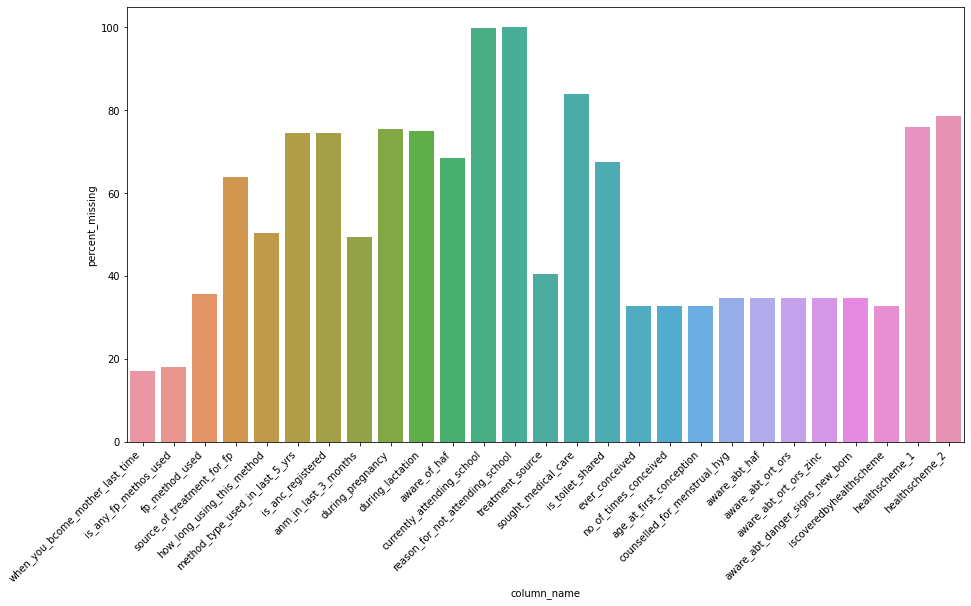

In [26]:
nan_data = missing_value_m_df_eda[missing_value_m_df_eda['percent_missing'] > 10]
plt.figure(figsize=(15,8))
ax = sns.barplot(nan_data.column_name, nan_data.percent_missing)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [0]:
missing_value_m_df_eda.sort_values('percent_missing', inplace=True)

In [0]:
missing_value_m_df_eda[missing_value_m_df_eda['percent_missing'] <= 50]

,column_name,percent_missing
state,state,0.000000
social_group_code,social_group_code,0.000000
delivered_any_baby,delivered_any_baby,0.000000
marital_status,marital_status,0.000000
religion,religion,0.000000
rural,rural,0.000000
district,district,0.000000
age,age,0.000000
mother_age_when_baby_was_born,mother_age_when_baby_was_born,0.001255
born_alive_total,born_alive_total,0.004112


Remove columns from data frame whose values in the above table is double digit.

For some columns you can keep them if you think that you can attribute the NaN to some valis possible default state. For eg. iscoveredbyhealthscheme column has values Yes(1), No(2) and Don't Know(3). Where NaN, substitute the values with 3 for Don't Know.

In [0]:
percent_missing = m_df.head(lengthdf, npartitions=-1).isnull().sum() * 100 / len(m_df)
missing_value_m_df = pd.DataFrame({'column_name': m_df.columns,
                                   'percent_missing': percent_missing})
missing_value_m_df.sort_values('percent_missing', inplace=True)

In [0]:
missing_value_m_df.dtypes

column_name         object
percent_missing    float64
dtype: object

In [0]:
missing_value_m_df[missing_value_m_df['percent_missing'] <= 20.0]

,column_name,percent_missing
state,state,0.000000
social_group_code,social_group_code,0.000000
delivered_any_baby,delivered_any_baby,0.000000
marital_status,marital_status,0.000000
religion,religion,0.000000
rural,rural,0.000000
district,district,0.000000
age,age,0.000000
mother_age_when_baby_was_born,mother_age_when_baby_was_born,0.001255
born_alive_total,born_alive_total,0.004112


##DECISION ON COLUMNS



```
'state', KEEP
'district', KEEP
'rural', KEEP
'age', KEEP
'marital_status', KEEP
'delivered_any_baby', KEEP
'religion', KEEP
'social_group_code', KEEP

'born_alive_female', DROP ROWS WHERE MISSING
'born_alive_male', DROP ROWS WHERE MISSING
'born_alive_total', DROP ROWS WHERE MISSING
'surviving_female', DROP ROWS WHERE MISSING
'surviving_male', DROP ROWS WHERE MISSING
'surviving_total', DROP ROWS WHERE MISSING
'mother_age_when_baby_was_born', DROP ROWS WHERE MISSING

MODERN METHODS: TRUE IF ANY ONE OF BELOW YES, ELSE FALSE
'is_tubectomy', DROP ROWS WHERE MISSING
'is_vasectomy', DROP ROWS WHERE MISSING
'is_copper_t', DROP ROWS WHERE MISSING
'is_pills_daily', DROP ROWS WHERE MISSING
'is_piils_weekly', DROP ROWS WHERE MISSING
'is_emergency_contraceptive', DROP ROWS WHERE MISSING
'is_condom', DROP ROWS WHERE MISSING
'is_moder_methods', DROP ROWS WHERE MISSING

TRADITIONAL METHODS: TRUE IF ANY ONE OF BELOW YES, ELSE FALSE
'is_contraceptive', DROP ROWS WHERE MISSING
'is_periodic_abstinence', DROP ROWS WHERE MISSING
'is_withdrawal', DROP ROWS WHERE MISSING
'is_amenorrahoea', DROP ROWS WHERE MISSING
'is_other_traditional_method', DROP ROWS WHERE MISSING

'when_you_bcome_mother_last_time', DROP
'is_any_fp_methos_used', DECIDE IF TO KEEP OR NOT (MISSING % 24.845166) - IMPUTE WITH DEFAULT NO?

'fp_method_used', TOO LOW
'source_of_treatment_for_fp', TOO LOW
'how_long_using_this_method', TOO LOW
'method_type_used_in_last_5_yrs', TOO LOW
'is_anc_registered', TOO LOW - DECIDE IF WANT TO IMPUTE WITH DEFAULT NO?
'anm_in_last_3_months', TOO LOW
'during_pregnancy', TOO LOW
'during_lactation', TOO LOW

AWARENESS
aware_abt_rti	KEEP, DECIDE IF WANT TO IMPUTE WITH DEFAULT NO?
aware_abt_hiv	KEEP, DECIDE IF WANT TO IMPUTE WITH DEFAULT NO?
aware_of_the_danger_signs	KEEP, DECIDE IF WANT TO IMPUTE WITH DEFAULT NO?
aware_abt_ort_ors_zinc	TOO LOW, DROP COLUMN
aware_abt_ort_ors	TOO LOW, DROP COLUMN
aware_abt_haf	TOO LOW, DROP COLUMN
aware_abt_danger_signs_new_born	TOO LOW, DROP COLUMN


'highest_qualification',  KEEP
'occupation_status', KEEP
'disability_status', KEEP

'currently_attending_school', TOO LOW, DROP COLUMN
'reason_for_not_attending_school', TOO LOW, DROP COLUMN
'injury_treatment_type', KEEP, IMPUTE WITH DEFAULT VALUE
'illness_type', KEEP, IMPUTE WITH DEFAULT VALUE
'treatment_source', TOO LOW, DROP COLUMN
'sought_medical_care', TOO LOW, DROP COLUMN

'chew', KEEP, DECIDE IF WANT TO IMPUTE WITH DEFAULT NO?
'smoke', KEEP, DECIDE IF WANT TO IMPUTE WITH DEFAULT NO?
'alcohol', KEEP, DECIDE IF WANT TO IMPUTE WITH DEFAULT NO?

'house_structure', KEEP, DROP ROWS WHERE MISSING (MISSING 5.662070%)
'drinking_water_source', KEEP, DROP ROWS WHERE MISSING (MISSING 5.662070%)
'is_water_filter', KEEP, DROP ROWS WHERE MISSING (MISSING 5.662070%)
'toilet_used', KEEP, DROP ROWS WHERE MISSING (MISSING 5.662070%)
'is_toilet_shared', TOO LOW, DROP COLUMN
'household_have_electricity', KEEP, DROP ROWS WHERE MISSING (MISSING 5.662070%)
'lighting_source', KEEP, DROP ROWS WHERE MISSING (MISSING 5.662070%)
'cooking_fuel', KEEP, DROP ROWS WHERE MISSING (MISSING 5.662070%)
'ever_conceived', DO NOT KEEP (MISSING 31.912420%)
'no_of_times_conceived', DO NOT KEEP (MISSING 31.912420%)
'age_at_first_conception', DO NOT KEEP (MISSING 31.912420)
'counselled_for_menstrual_hyg', KEEP, DECIDE IF WANT TO IMPUTE WITH DEFAULT NO? (MISSING 33.711399%)
'iscoveredbyhealthscheme', KEEP, DECIDE IF WANT TO IMPUTE WITH DEFAULT NO? (MISSING 33.711399%)
'healthscheme_1', TOO LOW, DROP COLUMN
'healthscheme_2', TOO LOW, DROP COLUMN
```

## eda continued


In [0]:
columns_to_drop = ['fp_method_used', 'source_of_treatment_for_fp', 'how_long_using_this_method',
                   'method_type_used_in_last_5_yrs', 'anm_in_last_3_months', 'during_pregnancy',
                   'during_lactation', 'aware_abt_ort_ors_zinc', 'aware_abt_ort_ors',
                   'aware_abt_haf', 'aware_abt_danger_signs_new_born',
                   'currently_attending_school', 'reason_for_not_attending_school', 'treatment_source',
                   'sought_medical_care', 'is_toilet_shared', 'ever_conceived', 'no_of_times_conceived',
                   'age_at_first_conception', 'healthscheme_1', 'healthscheme_2', 'when_you_bcome_mother_last_time']
m_df_eda_filterd = m_df_eda.drop(columns_to_drop, axis=1)                   
m_df_eda_filterd.shape[0].compute()

1434758

In [0]:
type(m_df_eda_filterd)

dask.dataframe.core.DataFrame

In [0]:
columns_to_drop_where_rows_missing = ['house_structure', 'drinking_water_source','is_water_filter',
                  'toilet_used', 'household_have_electricity', 'lighting_source',
                  'cooking_fuel', 'born_alive_female', 'born_alive_male', 'born_alive_total',
                  'surviving_female', 'surviving_male', 'surviving_total', 'mother_age_when_baby_was_born',
                  'is_tubectomy', 'is_vasectomy', 'is_copper_t', 'is_pills_daily', 'is_piils_weekly', 'is_emergency_contraceptive',
                  'is_condom', 'is_moder_methods', 'is_contraceptive', 'is_periodic_abstinence',
                  'is_withdrawal', 'is_amenorrahoea', 'is_other_traditional_method', 'religion', 'social_group_code']

for column in columns_to_drop_where_rows_missing:
  m_df_eda_filterd = m_df_eda_filterd[m_df_eda_filterd[column].notnull()]
  print('Done: ', column)

print(m_df_eda_filterd.shape[0].compute())

Done:  house_structure
Done:  drinking_water_source
Done:  is_water_filter
Done:  toilet_used
Done:  household_have_electricity
Done:  lighting_source
Done:  cooking_fuel
Done:  born_alive_female
Done:  born_alive_male
Done:  born_alive_total
Done:  surviving_female
Done:  surviving_male
Done:  surviving_total
Done:  mother_age_when_baby_was_born
Done:  is_tubectomy
Done:  is_vasectomy
Done:  is_copper_t
Done:  is_pills_daily
Done:  is_piils_weekly
Done:  is_emergency_contraceptive
Done:  is_condom
Done:  is_moder_methods
Done:  is_contraceptive
Done:  is_periodic_abstinence
Done:  is_withdrawal
Done:  is_amenorrahoea
Done:  is_other_traditional_method
Done:  religion
Done:  social_group_code
1314791


In [0]:
replacement_map = {'is_anc_registered': 2, 'aware_of_haf': 3, 'counselled_for_menstrual_hyg': 2,
               'iscoveredbyhealthscheme': 3, 'is_any_fp_methos_used': 2, 'aware_abt_hiv': 2,
               'aware_of_the_danger_signs': 2, 'aware_abt_rti': 2, 'alcohol': 0,
               'smoke': 0, 'chew': 0, 'disability_status': 0, 'injury_treatment_type': 0,
               'illness_type': 0, 'highest_qualification': 0, 'occupation_status': 16}

for column, replacement in replacement_map.items():
  print(column, replacement)
  m_df_eda_filterd[column] = m_df_eda_filterd[column].fillna(value=replacement)

print(m_df_eda_filterd.shape[0].compute())

is_anc_registered 2
aware_of_haf 3
counselled_for_menstrual_hyg 2
iscoveredbyhealthscheme 3
is_any_fp_methos_used 2
aware_abt_hiv 2
aware_of_the_danger_signs 2
aware_abt_rti 2
alcohol 0
smoke 0
chew 0
disability_status 0
injury_treatment_type 0
illness_type 0
highest_qualification 0
occupation_status 16
1314791


In [0]:
percent_missing = m_df_eda_filterd.head(lengthdf, npartitions=-1).isna().sum() * 100 / len(m_df_eda_filterd)
missing_value_m_df = pd.DataFrame({'column_name': m_df_eda_filterd.columns,
                                   'percent_missing': percent_missing})
missing_value_m_df.sort_values('percent_missing', inplace=True)
missing_value_m_df

/usr/local/lib/python3.6/dist-packages/dask/dataframe/core.py:5970: UserWarning: Insufficient elements for `head`. 1434758 elements requested, only 1314791 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,column_name,percent_missing
state,state,0.0
is_anc_registered,is_anc_registered,0.0
aware_abt_rti,aware_abt_rti,0.0
aware_abt_hiv,aware_abt_hiv,0.0
aware_of_haf,aware_of_haf,0.0
aware_of_the_danger_signs,aware_of_the_danger_signs,0.0
religion,religion,0.0
social_group_code,social_group_code,0.0
highest_qualification,highest_qualification,0.0
occupation_status,occupation_status,0.0


In [0]:
modern_method_columns = ['is_tubectomy', 'is_vasectomy', 'is_copper_t', 'is_pills_daily',
                         'is_piils_weekly', 'is_emergency_contraceptive', 'is_condom',
                         'is_moder_methods']
traditional_method_columns = ['is_contraceptive', 'is_periodic_abstinence', 'is_withdrawal',
                              'is_amenorrahoea', 'is_other_traditional_method']


def check_if_modern_method_used(row):
  return 1 if any([row[method] == 1 for method in modern_method_columns]) else 0

def check_if_traditional_method_used(row):
  return 1 if any([row[method] == 1 for method in traditional_method_columns]) else 0

m_df_eda_filterd['modern_methods_used'] = m_df_eda_filterd.apply(lambda row: check_if_modern_method_used(row), axis=1)
m_df_eda_filterd['traditional_methods_used'] = m_df_eda_filterd.apply(lambda row: check_if_traditional_method_used(row), axis=1)

m_df_eda_filterd.head(10)

/usr/local/lib/python3.6/dist-packages/dask/dataframe/core.py:4150: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'int64'))

  warnings.warn(meta_warning(meta))


,state,district,rural,age,marital_status,delivered_any_baby,born_alive_female,born_alive_male,born_alive_total,surviving_female,surviving_male,surviving_total,mother_age_when_baby_was_born,is_tubectomy,is_vasectomy,is_copper_t,is_pills_daily,is_piils_weekly,is_emergency_contraceptive,is_condom,is_moder_methods,is_contraceptive,is_periodic_abstinence,is_withdrawal,is_amenorrahoea,is_other_traditional_method,is_any_fp_methos_used,is_anc_registered,aware_abt_rti,aware_abt_hiv,aware_of_haf,aware_of_the_danger_signs,religion,social_group_code,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,chew,smoke,alcohol,house_structure,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,counselled_for_menstrual_hyg,iscoveredbyhealthscheme,modern_methods_used,traditional_methods_used
0,10,11,1,35.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,3.0,19.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,5.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1
1,10,11,1,40.0,3.0,1.0,3.0,4.0,7.0,3.0,3.0,6.0,29.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,1,1
2,10,11,1,40.0,3.0,1.0,2.0,3.0,5.0,2.0,3.0,5.0,27.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1
3,10,11,1,48.0,3.0,1.0,5.0,3.0,8.0,2.0,3.0,5.0,18.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1
5,10,11,1,35.0,3.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,20.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,1,1
6,10,11,1,32.0,3.0,1.0,2.0,4.0,6.0,2.0,4.0,6.0,17.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,1,1
7,10,11,1,28.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,20.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,5.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1
9,10,11,1,16.0,3.0,1.0,2.0,3.0,5.0,2.0,3.0,5.0,13.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1
10,10,11,1,40.0,3.0,1.0,2.0,2.0,4.0,2.0,2.0,4.0,25.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1
11,10,11,1,28.0,3.0,1.0,2.0,1.0,3.0,2.0,1.0,3.0,22.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1


In [0]:
m_df_eda_filterd = m_df_eda_filterd.drop(modern_method_columns + traditional_method_columns, axis=1)
len(m_df_eda_filterd.columns)

40

In [0]:
m_df_eda_filterd['children_lost'] = m_df_eda_filterd['born_alive_total'] - m_df_eda_filterd['surviving_total']
m_df_eda_filterd.head(10)

,state,district,rural,age,marital_status,delivered_any_baby,born_alive_female,born_alive_male,born_alive_total,surviving_female,surviving_male,surviving_total,mother_age_when_baby_was_born,is_any_fp_methos_used,is_anc_registered,aware_abt_rti,aware_abt_hiv,aware_of_haf,aware_of_the_danger_signs,religion,social_group_code,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,chew,smoke,alcohol,house_structure,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,counselled_for_menstrual_hyg,iscoveredbyhealthscheme,modern_methods_used,traditional_methods_used,children_lost
0,10,11,1,35.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,3.0,19.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,5.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,1.0
1,10,11,1,40.0,3.0,1.0,3.0,4.0,7.0,3.0,3.0,6.0,29.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,1,1,1.0
2,10,11,1,40.0,3.0,1.0,2.0,3.0,5.0,2.0,3.0,5.0,27.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,0.0
3,10,11,1,48.0,3.0,1.0,5.0,3.0,8.0,2.0,3.0,5.0,18.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,3.0
5,10,11,1,35.0,3.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,20.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,1,1,0.0
6,10,11,1,32.0,3.0,1.0,2.0,4.0,6.0,2.0,4.0,6.0,17.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,1,1,0.0
7,10,11,1,28.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,20.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,5.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,0.0
9,10,11,1,16.0,3.0,1.0,2.0,3.0,5.0,2.0,3.0,5.0,13.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,0.0
10,10,11,1,40.0,3.0,1.0,2.0,2.0,4.0,2.0,2.0,4.0,25.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,0.0
11,10,11,1,28.0,3.0,1.0,2.0,1.0,3.0,2.0,1.0,3.0,22.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,0.0


In [0]:
m_df_eda_filterd['children_lost'].mean().compute()

0.32512695934182695

In [0]:
len(m_df_eda_filterd.columns)

41

In [0]:
m_df_eda_filterd.head()

,state,district,rural,age,marital_status,delivered_any_baby,born_alive_female,born_alive_male,born_alive_total,surviving_female,surviving_male,surviving_total,mother_age_when_baby_was_born,is_any_fp_methos_used,is_anc_registered,aware_abt_rti,aware_abt_hiv,aware_of_haf,aware_of_the_danger_signs,religion,social_group_code,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,chew,smoke,alcohol,house_structure,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,counselled_for_menstrual_hyg,iscoveredbyhealthscheme,modern_methods_used,traditional_methods_used,children_lost
0,10,11,1,35.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,3.0,19.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,5.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,1.0
1,10,11,1,40.0,3.0,1.0,3.0,4.0,7.0,3.0,3.0,6.0,29.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,1,1,1.0
2,10,11,1,40.0,3.0,1.0,2.0,3.0,5.0,2.0,3.0,5.0,27.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,0.0
3,10,11,1,48.0,3.0,1.0,5.0,3.0,8.0,2.0,3.0,5.0,18.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,2.0,2.0,3.0,1,1,3.0
5,10,11,1,35.0,3.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,20.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,7.0,4.0,4.0,3,3.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0,1,1,0.0


In [0]:
m_df_eda_filterd['marital_status'].value_counts().compute()

3.0    1311059
4.0       3145
5.0        489
7.0         46
2.0         33
6.0         19
Name: marital_status, dtype: int64

# processing attempt 1 (boolean)



```
state - depends on clustering
district - depends on clustering

-> booleans
marital_status - convert to married or not, married 0 not married 1, 1 is positive
delivered_any_baby - yes 1, no 2 => yes 1, no 0, 1 is positive, we need 1s
is_any_fp_methos_used,	is_anc_registered	- yes 1, no 2 => yes 0, no 1, 0 is positive, we need 1
aware_abt_rti,	aware_abt_hiv,	aware_of_haf,	aware_of_the_danger_signs - yes 1, no 2 => yes 0, no 1, 0 is positive, we need 1
social_group_code - sc 1 st 2 others 3 => sc st 1, others 0, need to catch minority, we dont know others specifically
highest_qualification - literate 0 illiterate 1, change literacy level if needed
disability_status - boolean, disable 1 not 0
chew,	smoke,	alcohol - boolean, yes 1 not 0, 1 positive
is_water_filter - yes 1, no 2 => yes 0, no 1
household_have_electricity-  yes 1, no 2 => yes 0, no 1
lighting_source - boolean? Electricity-1 Solar -3 is 1 else 0
cooking_fuel - boolean? LPG/PNG -6,Electricity-7,Biogas-8 is 1 else 0
counselled_for_menstrual_hyg - yes 1, no 2 => yes 0, no 1
iscoveredbyhealthscheme - yes 1, no 2 => yes 0, no 1
modern_methods_used - yes 1, no 0 => yes 0, no 1
traditional_methods_used - yes 1, no 0 => yes 0, no 1
house_structure - (4 values, could one hot encode, but not so imp), so boolean, pucca semi pucca 0 not 1

-> one hot/label encode
rural - one hot encode

-> no change

age, mother_age_when_baby_was_born, mother_age_when_baby_was_born - standardize? or label encoding (1 to 10)


-> drop
occupation_status - drop, difficult to use because of values variety
injury_treatment_type,	illness_type	- drop
drinking_water_source - drop because 9 values and safe unsafe is difficult to decide
toilet_used - drop because 9 values and safe unsafe is difficult to decide
religion - (direct one hot encode or check value_counts or) drop
born_alive_female,	born_alive_male,	born_alive_total - (may remove)no change or normalise (because linear regression? obviously we will do on full data)
surviving_female	surviving_male	surviving_total - (may remove)no change or normalise (because linear regression? obviously we will do on full data)
```



In [0]:
# boolean_cols = ['marital_status', 'traditional_methods_used', 'modern_methods_used', 'iscoveredbyhealthscheme', 'counselled_for_menstrual_hyg',
#                 'cooking_fuel', 'lighting_source', 'household_have_electricity', 'is_water_filter', 'chew', 'smoke', 'alcohol', 
#                 'disability_status', 'highest_qualification', 'social_group_code', 'aware_abt_rti', 'aware_abt_hiv', 'aware_of_haf', 'aware_of_the_danger_signs', 
#                 'is_any_fp_methos_used', 'is_anc_registered', 'delivered_any_baby', 'marital_status']
# drop_cols = ['occupation_status', 'injury_treatment_type', 'drinking_water_source', 'toilet_used', 'religion']
# one_hot_cols = ['rural']

# decode = {1:'yes', 2:'no'}
# custom_decode = {1:'yes', 0:'no'}
# married = {2:'yes', 3:'yes', 4:'yes'}   #Married but Gauna not performed-2,Married and Gauna performed-3,Remarried -4,Widow/Widower-5,Divorced-6,Separated-7,Not stated-8
# cooking_fuel = {6:'yes', 7:'yes', 8:'yes'} #Firewood-1,Crop Residue -2,Cow dung cake -3,Coal/lignite/Charcoal-4,Kerosene-5,LPG/PNG -6,Electricity-7,Biogas-8,Any other-9,No cooking-0
# lighting_source = {1:'yes', 3:'yes'} #Electricity-1,Kerosene-2,Solar -3,Other Oils-4,Any other-5,No lighting-6
# chew = {1:'yes', 2:'yes', 3:'yes', 4:'yes', 5:'yes', 6:'yes'} #Pan with tobacco-1,Pan without tobacco-2,Gutka/Pan masala with tobacco-3,Gutka/Pan masala without tobacco -4,Tobacco only-5,Ex – Chewer -6,Never chewed-7,Not known-0
# smoke = {1:'yes', 2:'yes', 3:'yes'} #Usual smoker-1,Occasional smoker-2,Ex – Smoker-3,Never smoked-4,Not known-0
# alcohol = {1:'yes', 2:'yes', 3:'yes'} #Usual drinker-1,Occasional drinker-2,Ex – drinker-3,Never drank-4,Not known-0
# disability_status = {1:'yes', 2:'yes', 3:'yes', 4:'yes', 5:'yes', 6:'yes', 7:'yes'} #Mental-1,Visual-2,Hearing-3,Speech-4,Locomotor-5,Multiple-6,No Disability-0 (Others--7 :used in First & Second updation Survey only: details for Codes 0 to 6 remained same during the First & Second updation Survey ) 
# highest_qualification = {1:'yes', 2:'yes', 3:'yes', 4:'yes', 5:'yes', 6:'yes', 7:'yes', 8:'yes', 9:'yes'} #Illiterate-0,Literate Without formal education-1,Literate With formal education-Below primary-2,Literate With formal education-Primary-3,Literate With formal education-Middle-4,Literate With formal education-Secondary/Matric (Class-X)-5,Literate With formal education-Hr. Secondary/Sr. Secondary/Pre-university(Class XII)-6,Literate With formal education-Graduate/B.Tech/B.B.A/MBBS/Equivalent-7,Literate With formal education-Post Grad/ M.Tech/M.B.A/ MD/Equivalent or higher-8, Literate With formal education-Non-technical/Technical diploma or certificate not equivalent to a degree-9
# social_group_code = {1:'yes', 2:'yes'} #SC-1, ST-2, Others-3
# house_structure = {1:'yes', 2:'yes'} #Pucca -1, Semi Pucca -2, Kuccha -3, Others -4
# iscoveredbyhealthscheme = {1:'yes'}
# counselled_for_menstrual_hyg = {1:'yes'}
# yesPositive = {'yes':1, 'no':0}
# noPositive = {'yes':0, 'no':1}

# def convertToNo(x):
#   return 'no' if x != 'yes' else x

# def process(df):
#   # boolean processing
#   for col in boolean_cols:
#     if col == 'marital_status':
#       df[col] = df[col].map(married).apply(convertToNo).map(noPositive)
#     elif col == 'traditional_methods_used':
#       df[col] = df[col].map(custom_decode).map(noPositive)
#     elif col == 'modern_methods_used':
#       df[col] = df[col].map(custom_decode).map(noPositive)
#     elif col == 'iscoveredbyhealthscheme':
#       df[col] = df[col].map(iscoveredbyhealthscheme).apply(convertToNo).map(noPositive)
#     elif col == 'counselled_for_menstrual_hyg':
#       df[col] = df[col].map(counselled_for_menstrual_hyg).apply(convertToNo).map(noPositive)
#     elif col == 'cooking_fuel':
#       df[col] = df[col].map(cooking_fuel).apply(convertToNo).map(noPositive)
#     elif col == 'lighting_source':
#       df[col] = df[col].map(lighting_source).apply(convertToNo).map(noPositive)
#     elif col == 'household_have_electricity':
#       df[col] = df[col].map(decode).apply(convertToNo).map(noPositive)
#     elif col == 'is_water_filter':
#       df[col] = df[col].map(decode).apply(convertToNo).map(noPositive)
#     elif col == 'chew':
#       df[col] = df[col].map(chew).apply(convertToNo).map(yesPositive)
#     elif col == 'smoke':
#       df[col] = df[col].map(smoke).apply(convertToNo).map(yesPositive)
#     elif col == 'alcohol':
#       df[col] = df[col].map(alcohol).apply(convertToNo).map(yesPositive)
#     elif col == 'disability_status':
#       df[col] = df[col].map(disability_status).apply(convertToNo).map(yesPositive)
#     elif col == 'highest_qualification':
#       df[col] = df[col].map(highest_qualification).apply(convertToNo).map(noPositive)
#     elif col == 'social_group_code':
#       df[col] = df[col].fillna(3).map(social_group_code).apply(convertToNo).map(yesPositive)
#     elif col == 'house_structure':
#       df[col] = df[col].map(social_group_code).apply(convertToNo).map(noPositive)
#     elif col == 'aware_abt_rti' or col == 'aware_abt_hiv' or col == 'aware_of_haf' or col == 'aware_of_the_danger_signs' or col == 'is_any_fp_methos_used' or col == 'is_anc_registered' or col == 'delivered_any_baby':
#       df[col] = df[col].map(decode).apply(convertToNo).map(noPositive)

#   # drop columns
#   df = df.drop(drop_cols, axis=1)

#   # one hot encoding
#   rural = {1:'yes', 2:'no'} # Rural-1, Urban-2
#   urban = {2:'yes', 1:'no'} # Rural-1, Urban-2
#   df['urban'] = df['rural'].map(urban).map(noPositive)
#   df['rural'] = df['rural'].map(rural).map(yesPositive)

#   return df.astype('int8')

# preprocessing attempt2 (rating based)

In [0]:
rating_cols = ['iscoveredbyhealthscheme', 'counselled_for_menstrual_hyg',
                'cooking_fuel', 'lighting_source', 'household_have_electricity', 'is_water_filter', 'chew', 'smoke', 'alcohol', 
                'disability_status', 'highest_qualification', 'social_group_code', 'aware_abt_rti', 'aware_abt_hiv', 'aware_of_haf', 'aware_of_the_danger_signs', 
                'is_any_fp_methos_used', 'is_anc_registered', 'delivered_any_baby', 'marital_status', 'rural']
drop_cols = ['occupation_status', 'injury_treatment_type', 'drinking_water_source', 'toilet_used', 'religion']

decode = {1:'1', 2:'0'}
# custom_decode = {1:'1', 0:'0'}

married = {2:'0', 3:'1', 4:'2', 5:'3', 6:'7', 7:'8', 8:np.NaN} #Married but Gauna not performed-2,Married and Gauna performed-3,Remarried -4,Widow/Widower-5,Divorced-6,Separated-7,Not stated-8
cooking_fuel = {1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'0', 0:'0'} #Firewood-1,Crop Residue -2,Cow dung cake -3,Coal/lignite/Charcoal-4,Kerosene-5,LPG/PNG -6,Electricity-7,Biogas-8,Any other-9,No cooking-0
lighting_source = {4:'1', 2:'2', 1:'3', 3:'4', 5:'0', 6:'0'} #Electricity-1,Kerosene-2,Solar -3,Other Oils-4,Any other-5,No lighting-6
chew = {0:'0', 3:'1', 5:'2', 4:'3', 2:'4', 6:'5', 7:'6'} #Pan with tobacco-1,Pan without tobacco-2,Gutka/Pan masala with tobacco-3,Gutka/Pan masala without tobacco -4,Tobacco only-5,Ex – Chewer -6,Never chewed-7,Not known-0
smoke = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'} #Usual smoker-1,Occasional smoker-2,Ex – Smoker-3,Never smoked-4,Not known-0
alcohol = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'} #Usual drinker-1,Occasional drinker-2,Ex – drinker-3,Never drank-4,Not known-0
disability_status = {1:'1', 2:'1', 3:'1', 4:'1', 5:'1', 6:'1', 7:'1', 0:'0'} #Mental-1,Visual-2,Hearing-3,Speech-4,Locomotor-5,Multiple-6,No Disability-0 (Others--7 :used in First & Second updation Survey only: details for Codes 0 to 6 remained same during the First & Second updation Survey ) 
highest_qualification = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'8', 8:'9', 9:'7'} #Illiterate-0,Literate Without formal education-1,Literate With formal education-Below primary-2,Literate With formal education-Primary-3,Literate With formal education-Middle-4,Literate With formal education-Secondary/Matric (Class-X)-5,Literate With formal education-Hr. Secondary/Sr. Secondary/Pre-university(Class XII)-6,Literate With formal education-Graduate/B.Tech/B.B.A/MBBS/Equivalent-7,Literate With formal education-Post Grad/ M.Tech/M.B.A/ MD/Equivalent or higher-8, Literate With formal education-Non-technical/Technical diploma or certificate not equivalent to a degree-9
social_group_code = {1:'1', 2:'2', 3:'3'} #SC-1, ST-2, Others-3
house_structure = {1:'1', 2:'2', 3:'3', 4:'4'} #Pucca -1, Semi Pucca -2, Kuccha -3, Others -4
iscoveredbyhealthscheme = {1:'1', 2:'2', 3:'3'}
counselled_for_menstrual_hyg = {1:'1', 2:'0'}
rural = {1:'1', 2:'2'}

def convertToNo(x):
  return 'no' if x != 'yes' else x

def process(df):
  df = df.astype('int8')
  # print(df.isna().sum())
  # boolean processing
  for col in rating_cols:
    if col == 'marital_status':
      df[col] = df[col].map(married).astype('int8')
    elif col == 'traditional_methods_used':
      continue
    elif col == 'modern_methods_used':
      continue
    elif col == 'iscoveredbyhealthscheme':
      df[col] = df[col].replace(iscoveredbyhealthscheme).astype('int8')
    elif col == 'counselled_for_menstrual_hyg':
      df[col] = df[col].replace(counselled_for_menstrual_hyg).astype('int8')
    elif col == 'cooking_fuel':
      df[col] = df[col].replace(cooking_fuel).astype('int8')
    elif col == 'lighting_source':
      df[col] = df[col].replace(lighting_source).astype('int8')
    elif col == 'household_have_electricity':
      df[col] = df[col].replace(decode).astype('int8')
    elif col == 'is_water_filter':
      df[col] = df[col].replace(decode).astype('int8')
    elif col == 'chew':
      df[col] = df[col].replace(chew).astype('int8')
    elif col == 'smoke':
      df[col] = df[col].replace(smoke).astype('int8')
    elif col == 'alcohol':
      df[col] = df[col].replace(alcohol).astype('int8')
    elif col == 'disability_status':
      df[col] = df[col].replace(disability_status).astype('int8')
    elif col == 'highest_qualification':
      df[col] = df[col].replace(highest_qualification).astype('int8')
    elif col == 'social_group_code':
      df[col] = df[col].replace(social_group_code).astype('int8')
    elif col == 'house_structure':
      df[col] = df[col].replace(social_group_code).astype('int8')
    elif col == 'aware_abt_rti' or col == 'aware_abt_hiv' or col == 'aware_of_haf' or col == 'aware_of_the_danger_signs' or col == 'is_any_fp_methos_used' or col == 'is_anc_registered' or col == 'delivered_any_baby':
      df[col] = df[col].replace(decode).astype('int8')
    elif col == 'rural':
      df[col] = df[col].replace(rural).astype('int8')
    
  # drop columns
  df = df.drop(drop_cols, axis=1)

  return df.astype('int8')

In [0]:
m_df_eda_filterd_p = process(m_df_eda_filterd)

# save data

In [0]:
# m_df_eda_filterd_p.to_csv("data/processed_"+csv_name+".csv", compute=True, single_file = True)

In [0]:
finalcsv = m_df_eda_filterd_p.compute()

In [0]:
finalcsv

,state,district,rural,age,marital_status,delivered_any_baby,born_alive_female,born_alive_male,born_alive_total,surviving_female,surviving_male,surviving_total,mother_age_when_baby_was_born,is_any_fp_methos_used,is_anc_registered,aware_abt_rti,aware_abt_hiv,aware_of_haf,aware_of_the_danger_signs,social_group_code,highest_qualification,disability_status,illness_type,chew,smoke,alcohol,house_structure,is_water_filter,household_have_electricity,lighting_source,cooking_fuel,counselled_for_menstrual_hyg,iscoveredbyhealthscheme,modern_methods_used,traditional_methods_used,children_lost
0,10,11,1,35,1,1,2,2,4,2,1,3,19,0,0,0,0,3,0,1,0,0,5,6,4,4,3,0,0,2,2,0,3,1,1,1
1,10,11,1,40,1,1,3,4,7,3,3,6,29,1,0,0,0,3,0,1,0,0,0,6,4,4,3,0,0,2,3,0,3,1,1,1
2,10,11,1,40,1,1,2,3,5,2,3,5,27,0,0,0,0,3,0,1,0,0,0,6,4,4,3,0,0,2,2,0,3,1,1,0
3,10,11,1,48,1,1,5,3,8,2,3,5,18,0,0,0,0,3,0,1,0,0,0,6,4,4,3,0,0,2,2,0,3,1,1,3
5,10,11,1,35,1,1,1,3,4,1,3,4,20,0,0,0,0,3,0,1,0,0,0,6,4,4,3,0,0,2,3,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47146,10,16,1,40,1,1,1,4,5,1,4,5,21,0,0,1,1,3,1,1,0,0,0,6,4,4,1,0,0,2,1,0,1,1,1,0
47147,10,16,1,20,1,1,3,3,6,3,3,6,19,0,0,1,1,3,1,1,3,0,0,6,4,4,3,0,0,2,1,0,1,1,1,0
47148,10,16,1,30,1,1,1,1,2,1,1,2,19,0,0,1,1,3,1,1,0,0,0,6,4,4,3,0,0,2,1,0,1,1,1,0
47149,10,16,1,31,1,1,1,3,4,1,3,4,21,0,0,1,1,3,1,1,0,0,0,6,4,4,1,0,0,2,1,0,1,1,1,0


In [0]:
# finalcsv.to_csv("data/processed2_"+csv_name+".csv", index=False)

In [0]:
features = finalcsv.loc[:, finalcsv.columns != 'children_lost']
labels = finalcsv.loc[:, finalcsv.columns == 'children_lost']

In [0]:
x = features.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [0]:
finalcsv = pd.DataFrame(x_scaled, columns=features.columns)
finalcsv['children_lost'] = labels.values

In [0]:
finalcsv.to_csv("data/processedTest22_"+csv_name+".csv", index=False)